**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

%matplotlib inline

**First, import the cleaned data set. Then, select the features from the DataFrame of the case study data.**
    
These features should be: `'LIMIT_BAL'`, `'EDUCATION'`, `'MARRIAGE'`, `'AGE'`, `'PAY_1'`, `'BILL_AMT1'`, `'BILL_AMT2'`, `'BILL_AMT3'`, `'BILL_AMT4'`, `'BILL_AMT5'`, `'BILL_AMT6'`, `'PAY_AMT1'`, `'PAY_AMT2'`, `'PAY_AMT3'`, `'PAY_AMT4'`, `'PAY_AMT5'`, AND `'PAY_AMT6'`.

In [78]:
# Import data set
df_data=pd.read_csv(r'F:\internship2020_kaggle\week2\task1\Data_Exploration_and_Cleaning\cleaned_data.csv').set_index('ID')
df_data=df_data[~df_data.isin([np.nan,np.inf,-np.inf]).any(1)]

df_data=df_data.reset_index()

print(df_data.columns)
print(df_data.shape)
df_data

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')
(12630, 30)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,1.0,university,0.0,0.0,0.0,1.0
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000.0,1000.0,0.0,2000.0,1.0,university,0.0,0.0,0.0,1.0
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000.0,1000.0,1000.0,5000.0,0.0,university,0.0,0.0,0.0,1.0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200.0,1100.0,1069.0,1000.0,0.0,university,0.0,0.0,0.0,1.0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000.0,9000.0,689.0,679.0,0.0,university,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12625,ce5c2399-8334,50000,1,3,2,29,2,2,3,3,...,0.0,0.0,0.0,0.0,1.0,high school,0.0,1.0,0.0,0.0
12626,cb32900d-8c3a,20000,1,2,2,24,1,2,0,0,...,1500.0,1500.0,1000.0,0.0,1.0,university,0.0,0.0,0.0,1.0
12627,b2179ead-4cd0,110000,1,2,2,29,-1,-1,-1,-1,...,4219.0,9704.0,6952.0,5038.0,0.0,university,0.0,0.0,0.0,1.0
12628,936519c9-0585,150000,2,1,2,40,-2,-2,-2,-2,...,0.0,222.0,0.0,401.0,0.0,graduate school,1.0,0.0,0.0,0.0


In [148]:
# Create features list

feature_list=['LIMIT_BAL','EDUCATION','MARRIAGE','AGE','PAY_1','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

X=df_data[feature_list]
print(X.shape)
y=df_data['default payment next month']
print(y.shape)
# when we do things as dtaframe it eill through as a indexing error in kfold split indexing that will be avoided by changing this to numpy array
X=np.array(X)
y=np.array(y)
df_data[feature_list]

(12630, 17)
(12630,)


,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,1,24,2,3913,3102,689,0,0,0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,2,2,26,-1,2682,1725,2682,3272,3455,3261,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,2,2,34,0,29239,14027,13559,14331,14948,15549,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,2,1,37,0,46990,48233,49291,28314,28959,29547,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,2,1,57,-1,8617,5670,35835,20940,19146,19131,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12625,50000,3,2,29,2,1050,1050,1050,1050,1050,1050,0.0,0.0,0.0,0.0,0.0,0.0
12626,20000,2,2,24,1,16981,16424,17242,18448,19495,20026,0.0,1400.0,1500.0,1500.0,1000.0,0.0
12627,110000,2,2,29,-1,10839,2995,2419,4219,9704,6952,2995.0,2419.0,4219.0,9704.0,6952.0,5038.0
12628,150000,1,2,40,-2,-3,371,0,0,222,0,374.0,0.0,0.0,222.0,0.0,401.0


_____________________________________________________
**Next, make a 80:20 train/test split using a random seed of 24.**

In [106]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=24)

_____________________________________________________
**Then, instantiate the `MinMaxScaler` to scale the data.**

In [107]:
minmax=MinMaxScaler()

_____________________________________________________
**Next, instantiate a logistic regression model with the `saga` solver, L1 penalty, and set `max_iter` to 1,000 as we want the solver to have enough iterations to find a good solution.**

In [117]:
log=LogisticRegression(solver='saga',penalty='l1',max_iter=1000)

_____________________________________________________
**Next, import the `Pipeline` class and create a `Pipeline` with the scaler and the logistic regression model, using the names `'scaler'` and `'model'` for the steps, respectively.**

In [118]:
from sklearn.pipeline import Pipeline
pipeline= Pipeline(steps=[('scaler',minmax),('model',log)])

_____________________________________________________
**Now, use the `get_params` method to view the parameters from each stage of the pipeline.**

In [119]:
# Use `get_params`
pipeline.get_params

<bound method Pipeline.get_params of Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l1', random_state=None,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)>

**Use the `set_params` method to change the the `model__C` parameter to 2.**

In [120]:
# View what `model__C` is set to currently
print(pipeline.get_params().keys())
pipeline.get_params()['model__C']

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'model', 'scaler__copy', 'scaler__feature_range', 'model__C', 'model__class_weight', 'model__dual', 'model__fit_intercept', 'model__intercept_scaling', 'model__l1_ratio', 'model__max_iter', 'model__multi_class', 'model__n_jobs', 'model__penalty', 'model__random_state', 'model__solver', 'model__tol', 'model__verbose', 'model__warm_start'])


1.0

In [121]:
# Change `model__C` to 2
pipeline.set_params(model__C=2)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 LogisticRegression(C=2, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l1', random_state=None,
                                    solver='saga', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

_____________________________________________________
**Then, create a smaller range of C values to test with cross-validation, as these models will take longer to train and test with more data than our previous activities.**

**Use C_vals = [$10^2$, $10$, $1$, $10^{-1}$, $10^{-2}$, $10^{-3}$].**


<details>
    <summary>Hint:</summary>
    Recall that exponents in Python use the ** operator.
</details>

In [122]:
C_val=[10**2,10,1,10**-1,10**-2,10**-3]
C_val

[100, 10, 1, 0.1, 0.01, 0.001]

Now, define `k_folds` using `StratifiedKFold`. The number of folds should be 4. Set the random state to 1.

In [123]:
k_folds=StratifiedKFold(n_splits=4,random_state=1)

_____________________________________________________
**Next, make a new version of the `cross_val_C_search` function, called `cross_val_C_search_pipe`. Instead of the model argument, this function will take a pipeline argument. The changes inside the function will be to set the `C` value using `set_params(model__C = <value you want to test>)` on the pipeline, replacing the model with the pipeline for the fit and `predict_proba` methods, and accessing the `C` value using `pipeline.get_params()['model__C']` for the printed status update.**

In [132]:
def cross_val_C_search(k_folds, C_vals, pipeline, X, Y):
    n_folds = k_folds.n_splits
    #creating the empty list for storing the values
    cv_train_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc = [[]]*len(C_vals)
    
    
    for c_val_counter in range(len(C_vals)):
        #Set the C value for the model object
        pipeline.set_params(model__C = C_vals[c_val_counter])
        #Count folds for each value of C
        fold_counter = 0
        #Get training and testing indices for each fold
        for train_index, test_index in k_folds.split(X, Y):
            
            #Subset the features and response, for training and testing data for
            #this fold
            X_cv_train, X_cv_test = X[train_index], X[test_index]
            y_cv_train, y_cv_test = Y[train_index], Y[test_index]
            #Fit the model on the training data
            pipeline.fit(X_cv_train, y_cv_train)
            
            
            #Get the training ROC AUC
            y_cv_train_predict_proba = pipeline.predict_proba(X_cv_train)
            cv_train_roc_auc[fold_counter, c_val_counter] = \
            roc_auc_score(y_cv_train, y_cv_train_predict_proba[:,1])
            
            #Get the testing ROC AUC
            y_cv_test_predict_proba = pipeline.predict_proba(X_cv_test)
            cv_test_roc_auc[fold_counter, c_val_counter] = \
            roc_auc_score(y_cv_test, y_cv_test_predict_proba[:,1])
            
            #Testing ROC curves for each fold
            this_fold_roc = roc_curve(y_cv_test, y_cv_test_predict_proba[:,1])
            cv_test_roc[c_val_counter].append(this_fold_roc)
            
            #Increment the fold counter
            fold_counter += 1
            
            #Indicate progress
            print('Done with C = {}'.format(pipeline.get_params()['model__C']))
            
    return cv_train_roc_auc, cv_test_roc_auc, cv_test_roc


_____________________________________________________
**Now, run this function as in the previous activity, but using the new range of `C` values, the pipeline you created, and the features and response variable from the training split of the case study data.**

    You may see warnings here, or in later steps, about the non-convergence of the solver; you could experiment with the `tol` or `max_iter`` options to try and achieve convergence, although the results you obtain with `max_iter = 1000` are likely to be sufficient.

In [133]:
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc=cross_val_C_search(k_folds,C_val,pipeline,X_train,y_train)
cv_train_roc_auc

Done with C = 100
Done with C = 100
Done with C = 100
Done with C = 100
Done with C = 10
Done with C = 10
Done with C = 10
Done with C = 10
Done with C = 1
Done with C = 1
Done with C = 1
Done with C = 1
Done with C = 0.1
Done with C = 0.1
Done with C = 0.1
Done with C = 0.1
Done with C = 0.01
Done with C = 0.01
Done with C = 0.01
Done with C = 0.01
Done with C = 0.001
Done with C = 0.001
Done with C = 0.001
Done with C = 0.001


array([[0.70852797, 0.7081159 , 0.70509142, 0.70041112, 0.68131713,
        0.5       ],
       [0.71238749, 0.71184031, 0.70780249, 0.70465023, 0.68473144,
        0.5       ],
       [0.70856342, 0.70813044, 0.70417626, 0.69975893, 0.67851183,
        0.5       ],
       [0.70822483, 0.70790332, 0.70501262, 0.69937507, 0.6801012 ,
        0.5       ]])

_____________________________________________________
**Plot the average training and testing ROC AUC across folds, for each `np.log(C_vals)` value.**

Text(0.5, 1.0, 'Cross validation scores for each fold')

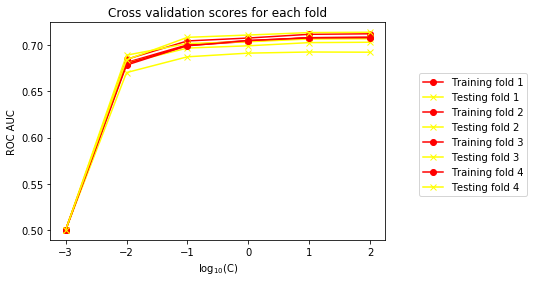

In [137]:
n_folds=k_folds.n_splits
C_val_exponents=[2,1,0,-1,-2,-3]
for this_fold in range(n_folds):
    plt.plot(C_val_exponents, cv_train_roc_auc[this_fold], '-o',
             color='red', label='Training fold {}'.format(this_fold+1))
    plt.plot(C_val_exponents, cv_test_roc_auc[this_fold], '-x',
             color='yellow', label='Testing fold {}'.format(this_fold+1))
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend(loc = [1.1, 0.2])
plt.title('Cross validation scores for each fold')

_____________________________________________________
**Up next, create interaction features for the case study data using scikit-learn's `PolynomialFeatures`. You should use 2 as the degree of polynomial features. Confirm that the number of new features makes sense.**

In [143]:
from sklearn.preprocessing import PolynomialFeatures
make_interactions = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly=make_interactions.fit_transform(X)

_____________________________________________________
**Finally, repeat the cross-validation procedure and observe the model performance now.**

In [145]:
# Using the new features, make a 80:20 train/test split using a random seed of 24.**
X_train_poly,X_test_poly,y_train_poly,y_test_poly=train_test_split(X_poly,y,test_size=0.2,random_state=24)


In [147]:
# Call the cross_val_C_search_pipe() function using the new training data.
# All other parameters should remain the same.
# Note that this training may take a few minutes due to the larger number of features.


cv_train_roc_auc, cv_test_roc_auc, cv_test_roc=cross_val_C_search(k_folds,C_val,pipeline,X_train_poly,y_train_poly)
cv_train_roc_auc



E:\annaconda\installed_files\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with C = 100


E:\annaconda\installed_files\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with C = 100


E:\annaconda\installed_files\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with C = 100


E:\annaconda\installed_files\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with C = 100


E:\annaconda\installed_files\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with C = 10


E:\annaconda\installed_files\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with C = 10


E:\annaconda\installed_files\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with C = 10


E:\annaconda\installed_files\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with C = 10


E:\annaconda\installed_files\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with C = 1


E:\annaconda\installed_files\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with C = 1


E:\annaconda\installed_files\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with C = 1


E:\annaconda\installed_files\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Done with C = 1
Done with C = 0.1
Done with C = 0.1
Done with C = 0.1
Done with C = 0.1
Done with C = 0.01
Done with C = 0.01
Done with C = 0.01
Done with C = 0.01
Done with C = 0.001
Done with C = 0.001
Done with C = 0.001
Done with C = 0.001


array([[0.74409122, 0.74043796, 0.72195105, 0.70340157, 0.68131713,
        0.5       ],
       [0.74617987, 0.7422757 , 0.72281053, 0.70482318, 0.68473144,
        0.5       ],
       [0.74714187, 0.74452097, 0.72520721, 0.70167136, 0.67851183,
        0.5       ],
       [0.74126033, 0.73856549, 0.71952058, 0.70055899, 0.6801012 ,
        0.5       ]])

Text(0.5, 1.0, 'Cross validation scores for each fold')

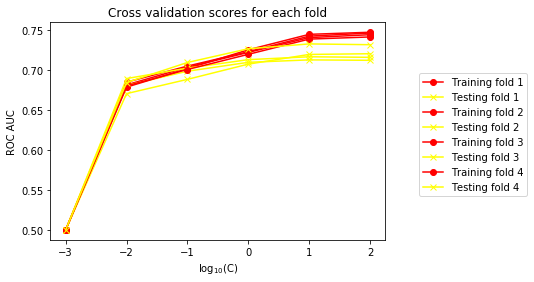

In [149]:
# Plot the average training and testing ROC AUC across folds, for each C value.
n_folds=k_folds.n_splits
C_val_exponents=[2,1,0,-1,-2,-3]
for this_fold in range(n_folds):
    plt.plot(C_val_exponents, cv_train_roc_auc[this_fold], '-o',
             color='red', label='Training fold {}'.format(this_fold+1))
    plt.plot(C_val_exponents, cv_test_roc_auc[this_fold], '-x',
             color='yellow', label='Testing fold {}'.format(this_fold+1))
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend(loc = [1.1, 0.2])
plt.title('Cross validation scores for each fold')

**Take a look at the above graph. Does the average cross-validation testing performance improve with the interaction features? Is regularization useful?**